<a href="https://colab.research.google.com/github/Rameshsah4447/Regression-using-python/blob/main/Bi_Directional_Using_Bfs_Dfs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Setup and Required Libraries


In [8]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque


Step 2: Define the Bidirectional BFS Function

In [9]:
def bidirectional_bfs(graph, start, goal):
    # Check if start and goal nodes are valid
    if start not in graph or goal not in graph:
        raise ValueError("Start or goal node not found in the graph.")

    if start == goal:
        return [start]

    # Initialize frontiers and visited dictionaries
    front_start = {start}
    front_goal = {goal}
    visited_start = {start: None}
    visited_goal = {goal: None}

    while front_start and front_goal:
        # Expand the frontier from the start
        next_front_start = set()
        for node in front_start:
            for neighbor in graph.neighbors(node):
                if neighbor not in visited_start:
                    visited_start[neighbor] = node
                    next_front_start.add(neighbor)
                    if neighbor in visited_goal:
                        return reconstruct_path(visited_start, visited_goal, neighbor)
        front_start = next_front_start

        # Expand the frontier from the goal
        next_front_goal = set()
        for node in front_goal:
            for neighbor in graph.neighbors(node):
                if neighbor not in visited_goal:
                    visited_goal[neighbor] = node
                    next_front_goal.add(neighbor)
                    if neighbor in visited_start:
                        return reconstruct_path(visited_start, visited_goal, neighbor)
        front_goal = next_front_goal

    return None  # No path found


Step 3: Reconstruct the Path

In [10]:
def reconstruct_path(visited_start, visited_goal, meeting_point):
    # Build the path from start to goal via the meeting point
    path = []
    current = meeting_point
    while current is not None:
        path.append(current)
        current = visited_start[current]
    path.reverse()

    current = visited_goal[meeting_point]
    while current is not None:
        path.append(current)
        current = visited_goal[current]

    return path


Step 4: Visualize the Graph

In [11]:
def visualize_graph(graph, path=None, start=None, goal=None):
    pos = nx.spring_layout(graph)  # Generate positions for nodes
    node_colors = ["skyblue"] * len(graph.nodes)
    edge_colors = ["black"] * len(graph.edges)

    # Highlight the path if it exists
    if path:
        edge_set = set(zip(path, path[1:])) | set(zip(path[1:], path))
        edge_colors = ["red" if (u, v) in edge_set or (v, u) in edge_set else "black" for u, v in graph.edges]
        node_colors = ["green" if node == start else "blue" if node == goal else "orange" if node in path else "skyblue" for node in graph.nodes]

    # Draw the graph
    nx.draw(
        graph,
        pos,
        with_labels=True,
        node_color=node_colors,
        edge_color=edge_colors,
        node_size=3000,
        font_size=15,
    )
    plt.title("Graph Visualization" + (f" with Path {path}" if path else ""))
    plt.show()


Step 5: Create the Graph and Execute the Code

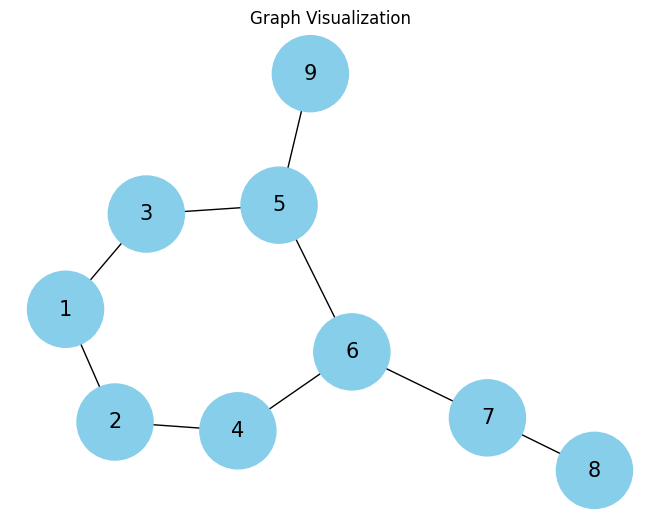

Shortest path from 1 to 9: [1, 3, 5, 9]


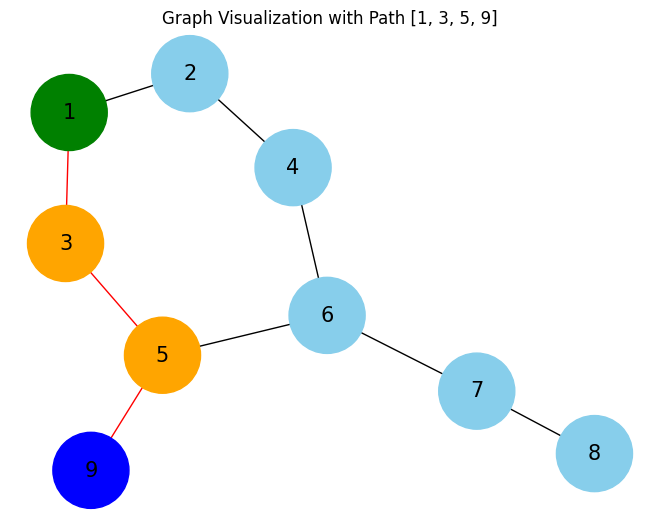

In [12]:
if __name__ == "__main__":
    # Create a graph
    G = nx.Graph()
    G.add_edges_from([
        (1, 2), (1, 3), (2, 4), (3, 5), (4, 6), (5, 6), (6, 7), (7, 8), (5, 9)
    ])

    start_node = 1
    goal_node = 9

    # Visualize the graph
    visualize_graph(G)

    # Run bidirectional BFS
    path = bidirectional_bfs(G, start_node, goal_node)
    if path:
        print(f"Shortest path from {start_node} to {goal_node}: {path}")
        # Visualize the graph with the path highlighted
        visualize_graph(G, path, start=start_node, goal=goal_node)
    else:
        print(f"No path found between {start_node} and {goal_node}.")
